<a href="https://colab.research.google.com/github/JonathanSum/Pytorch_Projects/blob/master/Character_idenf_deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://imgur.com/wniZTh0.jpg" width=300>

In [1]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0    178      0  0:00:01  0:00:01 --:--:--   178
Updating fastai...
Done.


In [0]:
from fastai.vision import *

Download the text and testing images in data folder

In [56]:
!wget --no-check-certificate \
    https://www.dropbox.com/s/9j5es6814e8nt8j/export.pkl?dl=1 \
    -O /content/data/export.pkl
!wget --no-check-certificate \
    https://www.dropbox.com/s/watgcm3jwfkpchl/sato%20%281%29.png?dl=1 \
    -O /content/data/sato_1.png
!wget --no-check-certificate \
    https://www.dropbox.com/s/sf3p3xhlcdrbw7u/sato%20%2860%29.jpg?dl=1 \
    -O /content/data/sato_3.jpg
!wget --no-check-certificate \
    https://www.dropbox.com/s/o1eqdw0itwunrrw/sato%20%2811%29.png?dl=1 \
    -O /content/data/sato_2.jpg


!wget --no-check-certificate \
    https://www.dropbox.com/s/hlpbzsu42z3grl8/shio%20%281%29.jpg?dl=1 \
    -O /content/data/shio_1.jpg
!wget --no-check-certificate \
    https://www.dropbox.com/s/go1369zy27n6239/shio%20%2819%29.jpg?dl=1 \
    -O /content/data/shio_2.jpg
!wget --no-check-certificate \
    https://www.dropbox.com/s/kt8e66adxrih33c/vlcsnap-2020-02-05-16h58m52s536.png?dl=1 \
    -O /content/data/shouko.png
!wget --no-check-certificate \
    https://www.dropbox.com/s/0jxcwtpmvebmoip/vlcsnap-2020-02-05-17h47m48s858.png?dl=1\
    -O /content/data/asahi.png

--2020-02-06 21:29:16--  https://www.dropbox.com/s/o1eqdw0itwunrrw/sato%20%2811%29.png?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/o1eqdw0itwunrrw/sato%20%2811%29.png [following]
--2020-02-06 21:29:16--  https://www.dropbox.com/s/dl/o1eqdw0itwunrrw/sato%20%2811%29.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4712068f10c971c1cc9a02e798.dl.dropboxusercontent.com/cd/0/get/Axn9MrpeLnieWANE3PWWynkQXmgkhw2jYxho8NM47hf2XUPZ0MJVXC4xOHUA_3A4ZSrNDjWQsmlUpjZZLPqETsMaK8VtjNIOJArzBs8HufNZ8-k8ouWV7qvcE6VZTF39f1M/file?dl=1# [following]
--2020-02-06 21:29:16--  https://uc4712068f10c971c1cc9a02e798.dl.dropboxusercontent.com/cd/0/get/Axn9MrpeLnieWANE3PWWynkQXmgkhw2jYxho8NM47hf2XUPZ0MJVXC4xOHUA_3A4ZSrNDjWQsmlUpjZZLPqETsMa

Set up the path and load the pre-trained deployed model

In [18]:
path = Path('/content/data'); path

PosixPath('/content/data')

In [0]:
learn = load_learner(path)

Upload your image

<img src="https://i.imgur.com/JLBJ0XL.png" width='200'>

In [0]:
img = open_image(path/'/content/sato (19).png')
l1=[
 open_image(path/'/content/data/sato_1.png'),
 open_image(path/'/content/data/sato_2.jpg'),
open_image(path/'/content/data/sato_3.jpg'),
open_image(path/'/content/data/shio_1.jpg'),
 open_image(path/'/content/data/shio_2.jpg'),
 open_image(path/'/content/data/asahi.png'),
 open_image(path/'/content/data/shouko.png')
]
# for img_i in l1:
#   show_image(img_i)

torch.Size([3, 1080, 1920])


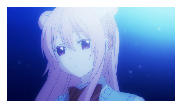

In [119]:
img = open_image(path/'/content/data/sato_2.jpg')     #
show_image(img)
print(img.shape)

In [122]:
pred_class,pred_idx,outputs = learn.predict(img)
print(pred_class)

sato


['sato', 'sato', 'sato', 'shio', 'shio', 'asahi', 'shouko']


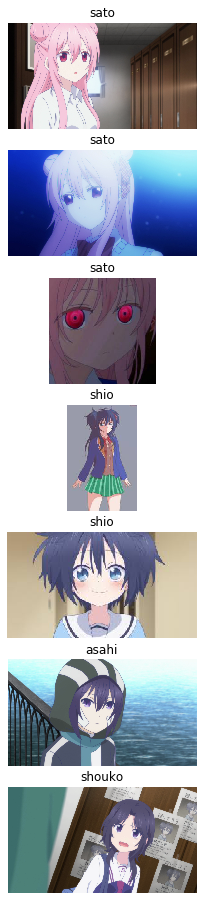

In [124]:
prd_list=[]
for img_p in l1:

  pred_class,pred_idx,outputs = learn.predict(img_p)
  prd_list.append(str(pred_class))
print(prd_list)
_,axs = plt.subplots(len(prd_list),1,figsize=(48,16))
for i,ax in enumerate(axs): l1[i].show(ax=ax, title=prd_list[i])